<div style="padding:20px;color:white;margin:0;font-size:300%;text-align:center;display:fill;border-radius:80px;background-color:#C70039;overflow:hidden;font-weight:800">
Super Store - Sales</div>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/superstore-sales/Superstore.csv
/kaggle/input/superstore-sales/Superstore.xlsx


## <b><div style='padding:15px;background-color:#C70039;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  About Dataset</div></b>

The "Superstore Sales" dataset is a comprehensive and versatile collection of data that provides valuable insights into sales, customer behavior, and product performance. This dataset offers a rich resource for in-depth analysis.

Containing information from diverse regions and segments, the dataset enables exploration of trends, patterns, and correlations in sales and customer preferences. The dataset encompasses sales transactions, enabling researchers and analysts to understand buying patterns, identify high-demand products, and assess the effectiveness of different shipping modes.

Moreover, the dataset provides an opportunity to examine the impact of various factors such as discounts, geographical locations, and product categories on profitability. By analyzing this dataset, businesses and data enthusiasts can uncover actionable insights for optimizing pricing strategies, supply chain management, and customer engagement.

Whether used for educational purposes, business strategy formulation, or data analysis practice, the "Superstore Sales" dataset offers a comprehensive platform to delve into the dynamics of sales operations, customer interactions, and the factors that drive business success.

## <b><div style='padding:15px;background-color:#C70039;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  Libraries</div></b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#C70039;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Dataset</div></b>

In [3]:
df = pd.read_csv('/kaggle/input/superstore-sales/Superstore.csv', encoding='ISO-8859-1')

In [4]:
# Check Dataset

print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## <b><div style='padding:15px;background-color:#C70039;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [5]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (9994, 21)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Row ID,int64,0,0.0,0,9994,9994,1.0,9994.0,4997.5,2885.163629,1,2,3
Order ID,object,0,0.0,0,5009,9994,NaN,NaN,NaN,NaN,CA-2013-152156,CA-2013-152156,CA-2013-138688
Order Date,object,0,0.0,0,1238,9994,NaN,NaN,NaN,NaN,09-11-2013,09-11-2013,13-06-2013
Ship Date,object,0,0.0,0,1334,9994,NaN,NaN,NaN,NaN,12-11-2013,12-11-2013,17-06-2013
Ship Mode,object,0,0.0,0,4,9994,NaN,NaN,NaN,NaN,Second Class,Second Class,Second Class
Customer ID,object,0,0.0,0,793,9994,NaN,NaN,NaN,NaN,CG-12520,CG-12520,DV-13045
Customer Name,object,0,0.0,0,793,9994,NaN,NaN,NaN,NaN,Claire Gute,Claire Gute,Darrin Van Huff
Segment,object,0,0.0,0,3,9994,NaN,NaN,NaN,NaN,Consumer,Consumer,Corporate
Country,object,0,0.0,0,1,9994,NaN,NaN,NaN,NaN,United States,United States,United States
City,object,0,0.0,0,531,9994,NaN,NaN,NaN,NaN,Henderson,Henderson,Los Angeles


<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#C70039;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>This data is clean from NaN values, Nulls and duplicates.</div>

In [6]:
# Numerical Data
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
# Categorical Data
df.describe(include= object)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1238,1334,4,793,793,3,1,531,49,4,1862,3,17,1841
top,CA-2014-100111,06-09-2013,16-12-2012,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staples
freq,14,38,35,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,227


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='mixed')


In [9]:
# Add new columns year, month and day
df["year"] = df["Order Date"].dt.year

# add new column month
df["month"] = df["Order Date"].dt.month_name()

# add new column day
df["day"] = df["Order Date"].dt.day_name()

In [10]:
# We can drop some columns we don't use in analysis
df.drop(columns = ["Customer ID", "Product ID", "Row ID"], inplace = True)

In [11]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month,day
0,CA-2013-152156,2013-09-11,2013-12-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2013,September,Wednesday
1,CA-2013-152156,2013-09-11,2013-12-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2013,September,Wednesday
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2013,June,Thursday
3,US-2012-108966,2012-11-10,2012-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2012,November,Saturday
4,US-2012-108966,2012-11-10,2012-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2012,November,Saturday


## <b><div style='padding:15px;background-color:#C70039;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  Exploratory Data Analysis - EDA</div></b>

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#C70039;border-color:black;width:80%;margin: auto;text-align: center;"><b>Comment: </b>The dataset presents a large number of features. In order not to make the kernel too long, I will focus the analysis on Profit, because after all, Profit is the most important thing for companies. Throughout the analysis, we will be able to see the features with the greatest profits and, in several cases, the greatest losses.</div>

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#C70039'> Sales</span></b> 

In [12]:
df["Sales"].unique()

array([261.96 , 731.94 ,  14.62 , ..., 437.472,  97.98 , 243.16 ])

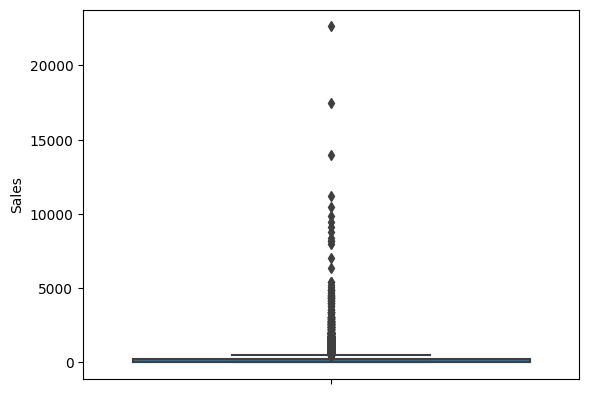

In [13]:
# Boxplot of Sales

sns.boxplot(y = "Sales", data = df)
plt.show()

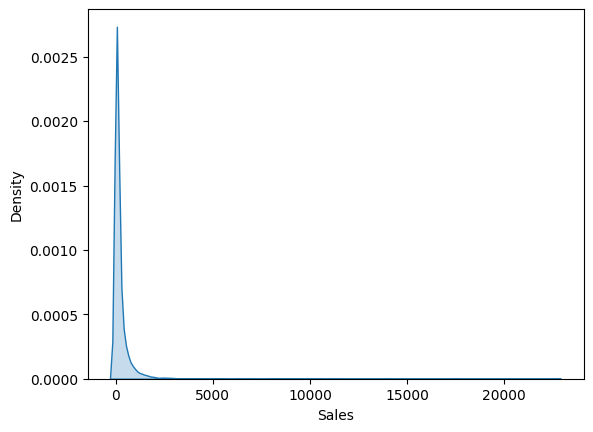

In [14]:
# see distribution of Sales

sns.kdeplot(x = df["Sales"], fill = True)
plt.show()

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#C70039'> Profit</span></b>  

In [15]:
df["Profit"].unique()

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ])

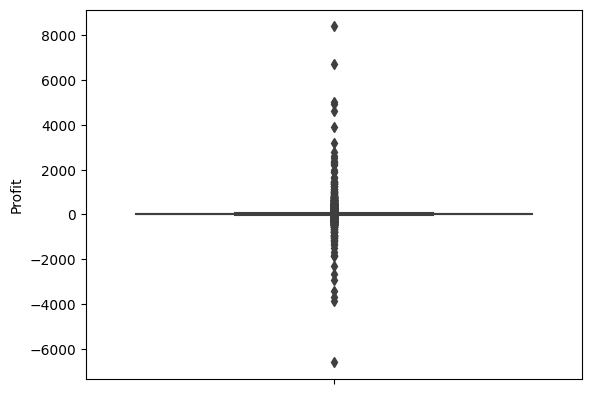

In [16]:
# Boxplot of Profit

sns.boxplot(y = "Profit", data = df)
plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#C70039;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>We can see here that there are many sales with profit and also with loss. It is very important to identify which ones make a profit and which ones make a loss so that corrective actions can be taken by the company.</div>

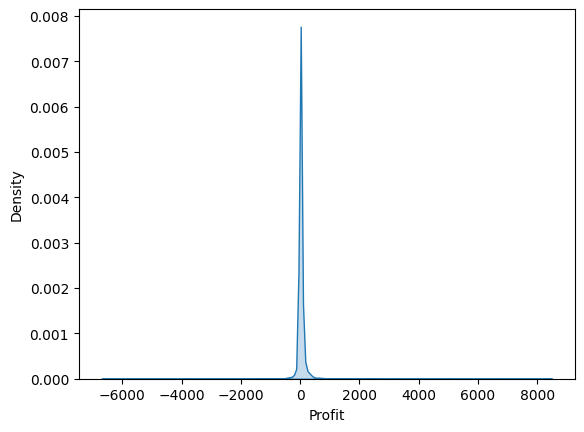

In [17]:
# see distribution of Profit

sns.kdeplot(x = df["Profit"], fill = True)
plt.show()

### <b><span style='color:#DEB078'>5.3 |</span><span style='color:#C70039'> Year</span></b>  

In [18]:
df['year'].unique()

array([2013, 2012, 2011, 2014], dtype=int32)

In [19]:
transactions_per_year = df['year'].value_counts()
transactions_per_year

year
2014    3319
2013    2580
2012    2102
2011    1993
Name: count, dtype: int64

In [20]:
iplot(px.bar(x=transactions_per_year.index, y=transactions_per_year.values,
             labels={'x': 'Year', 'y': 'Number of Transactions'},
             title='Transactions per Year', text_auto= True))

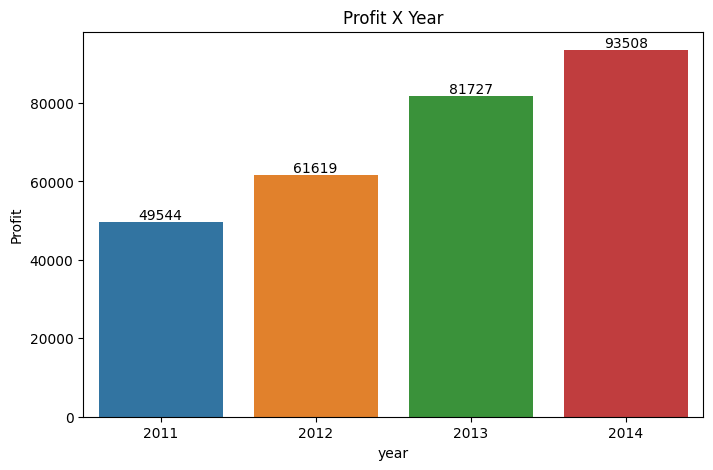

In [21]:
# Profit X Year
revenue = df.groupby("year")["Profit"].sum().reset_index()

# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = "year", y = "Profit", data = revenue)
plt.title("Profit X Year", fontsize = 12)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

### <b><span style='color:#DEB078'>5.4 |</span><span style='color:#C70039'> Month</b>  

In [22]:
transactions_per_month = df['month'].value_counts()
transactions_per_month

month
November     1223
September    1162
December     1098
May           847
March         821
October       811
August        786
June          745
July          734
April         729
January       532
February      506
Name: count, dtype: int64

In [23]:
iplot(px.bar(x=transactions_per_month.index, y=transactions_per_month.values,
             labels={'x': 'Month', 'y': 'Number of Transactions'},
             title='Transactions per Month', text_auto= True))

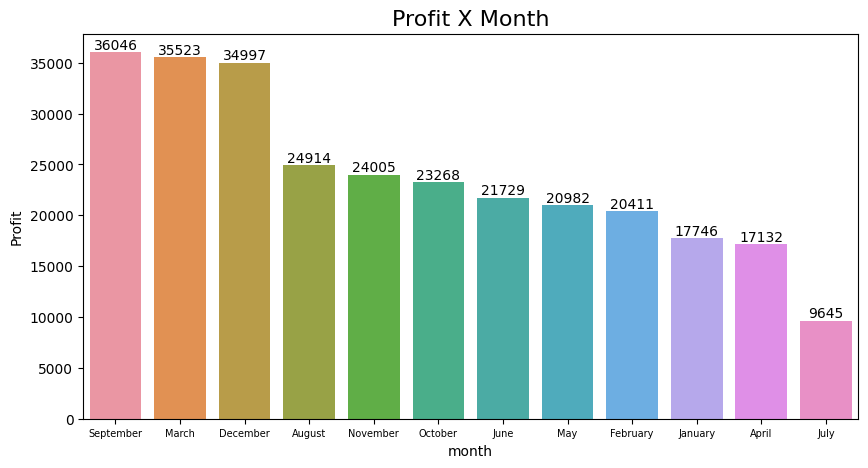

In [24]:
# Profit X Month
revenue = df.groupby("month")["Profit"].sum().reset_index()
revenue.sort_values(["Profit", "month"], axis=0, ascending=False, inplace=True)
# create bar plot
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = "month", y = "Profit", data = revenue)
plt.title("Profit X Month", fontsize = 16)
plt.xticks(rotation=0, fontsize = 7)


# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

### <b><span style='color:#DEB078'>5.5 |</span><span style='color:#C70039'> Day</span></b>  

In [25]:
transactions_per_day = df['day'].value_counts()
transactions_per_day

day
Friday       1738
Tuesday      1688
Thursday     1687
Monday       1602
Wednesday    1461
Saturday     1173
Sunday        645
Name: count, dtype: int64

In [26]:
iplot(px.bar(x=transactions_per_day.index, y=transactions_per_day.values,
             labels={'x': 'Day', 'y': 'Number of Transactions'},
             title='Transactions per Day', text_auto= True))

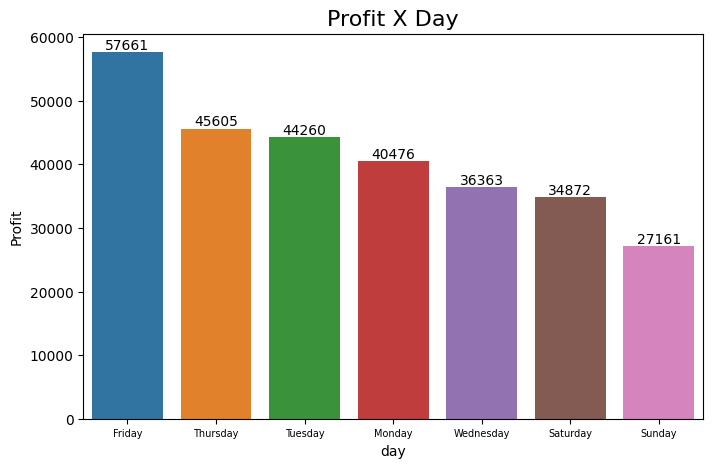

In [27]:
# Profit X Day
revenue = df.groupby("day")["Profit"].sum().reset_index()
revenue.sort_values(["Profit", "day"], axis=0, ascending=False, inplace=True)
# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = "day", y = "Profit", data = revenue)
plt.title("Profit X Day", fontsize = 16)
plt.xticks(rotation=0, fontsize = 7)


# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

### <b><span style='color:#DEB078'>5.6 |</span><span style='color:#C70039'> Quantity</span></b>  

In [28]:
no_sales_quantity = df['Quantity'].value_counts()
no_sales_quantity

Quantity
3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: count, dtype: int64

In [29]:
iplot(px.bar(x=no_sales_quantity.index, y=no_sales_quantity.values,
             labels={'x': 'Quantity', 'y': 'Number of sales'},
             title='Number of sales quantity', text_auto= True))

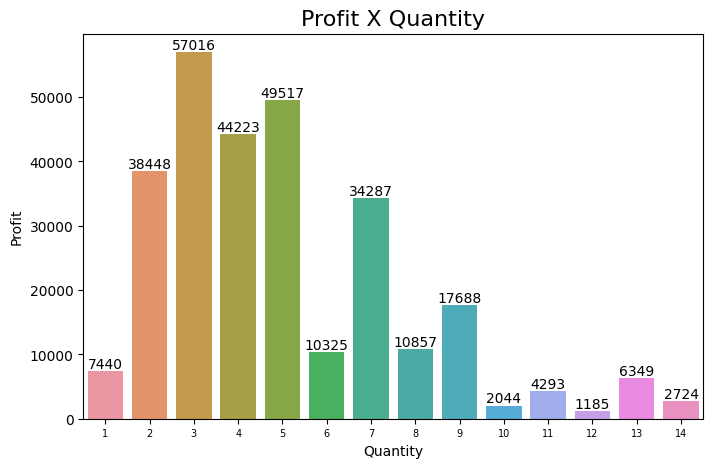

In [30]:
# Profit X Quantity
revenue = df.groupby("Quantity")["Profit"].sum().reset_index()
# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = "Quantity", y = "Profit", data = revenue)
plt.title("Profit X Quantity", fontsize = 16)
plt.xticks(rotation=0, fontsize = 7)


# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

### <b><span style='color:#DEB078'>5.7 |</span><span style='color:#C70039'> Ship Mode</span></b>  

In [31]:
sales_per_ship = df['Ship Mode'].value_counts()
sales_per_ship

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [32]:
iplot(px.pie(names=sales_per_ship.index, values=sales_per_ship.values,
             title='Percentagem of Sales for each Ship Mode'))

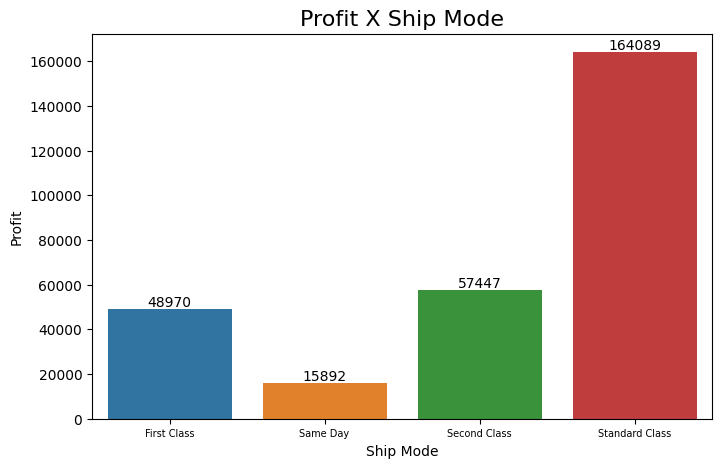

In [33]:
# Profit X Ship Mode
revenue = df.groupby("Ship Mode")["Profit"].sum().reset_index()
# create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(x = "Ship Mode", y = "Profit", data = revenue)
plt.title("Profit X Ship Mode", fontsize = 16)
plt.xticks(rotation=0, fontsize = 7)


# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

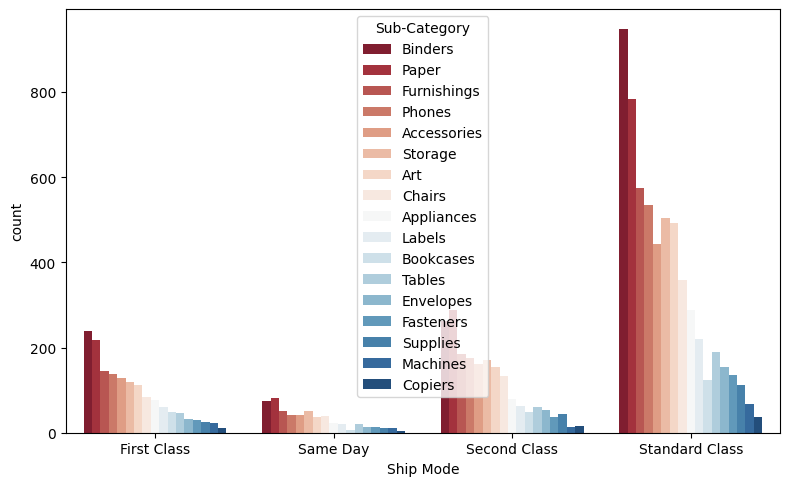

In [34]:
# Calculate number of Sub-Category at each Ship Mode
popular_products = df.groupby('Ship Mode')[['Sub-Category']].value_counts().reset_index(name='count')

# set figure size
plt.figure(figsize=(8, 5))

# Create a bar plot 
sns.barplot(x = 'Ship Mode', y = 'count', hue = 'Sub-Category', data = popular_products, palette = "RdBu")

plt.tight_layout()
plt.show()

### <b><span style='color:#DEB078'>5.8 |</span><span style='color:#C70039'> City</span></b> 

In [35]:
sales_per_city = df['City'].value_counts()
sales_per_city

City
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: count, Length: 531, dtype: int64

In [36]:
iplot(px.bar(x=sales_per_city.index, y=sales_per_city.values,
             labels={'x': 'City', 'y': 'Number of sales'},
             title='Number of Sales per City', text_auto= True))

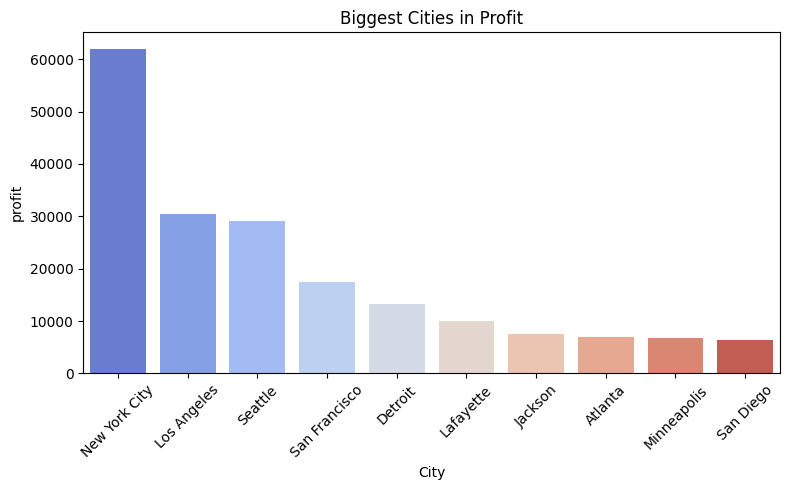

In [37]:
# Biggest Cities in Profit
category_revenue = df.groupby("City")["Profit"].sum().reset_index(name = "profit")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'profit', ascending = False).head(10)

# set figure size
plt.figure(figsize = (8,5))

# create bar plot
sns.barplot(x = "City", y = "profit", data = category_revenue, palette = "coolwarm")
plt.title("Biggest Cities in Profit", fontsize = 12)

# set x-axis rotation
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

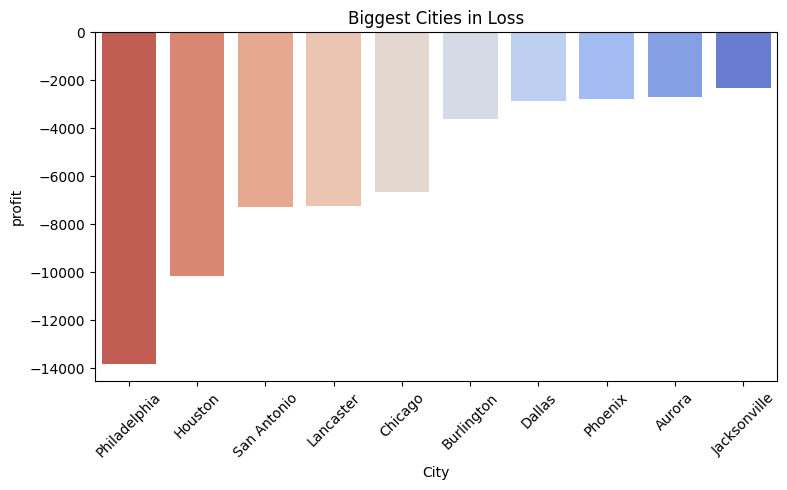

In [38]:
# Biggest Cities in Loss
category_revenue = df.groupby("City")["Profit"].sum().reset_index(name = "profit")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'profit', ascending = True).head(10)

# set figure size
plt.figure(figsize = (8,5))

# create bar plot
sns.barplot(x = "City", y = "profit", data = category_revenue, palette = "coolwarm_r")
plt.title("Biggest Cities in Loss", fontsize = 12)

# set x-axis rotation
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

### <b><span style='color:#DEB078'>5.9 |</span><span style='color:#C70039'> Customer Name</span></b>

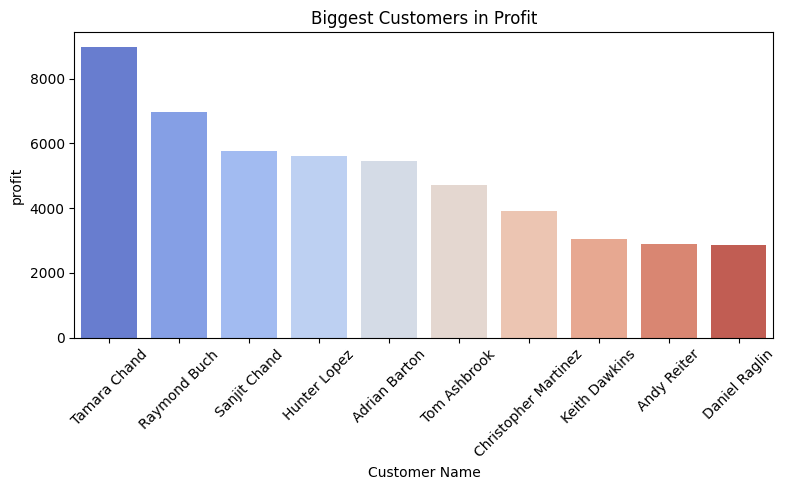

In [39]:
# Biggest Customers in Profit
category_revenue = df.groupby("Customer Name")["Profit"].sum().reset_index(name = "profit")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'profit', ascending = False).head(10)

# set figure size
plt.figure(figsize = (8,5))

# create bar plot
sns.barplot(x = "Customer Name", y = "profit", data = category_revenue, palette = "coolwarm")
plt.title("Biggest Customers in Profit", fontsize = 12)

# set x-axis rotation
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

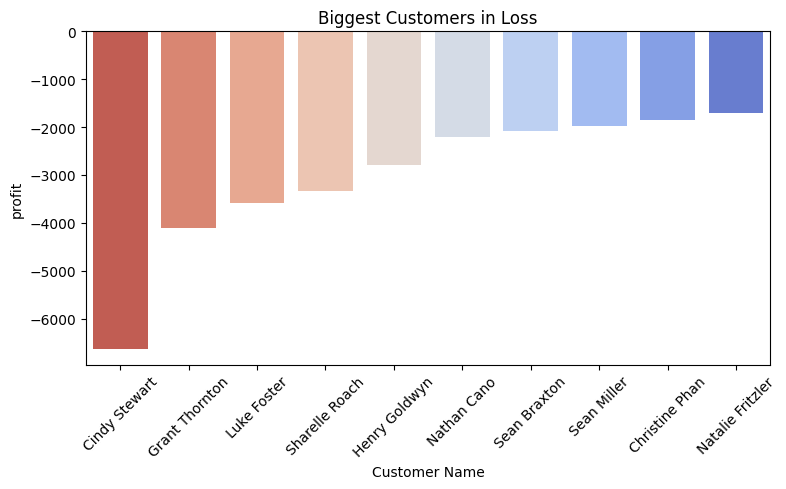

In [40]:
# Biggest Customers in Loss
category_revenue = df.groupby("Customer Name")["Profit"].sum().reset_index(name = "profit")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'profit', ascending = True).head(10)

# set figure size
plt.figure(figsize = (8,5))

# create bar plot
sns.barplot(x = "Customer Name", y = "profit", data = category_revenue, palette = "coolwarm_r")
plt.title("Biggest Customers in Loss", fontsize = 12)

# set x-axis rotation
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

### <b><span style='color:#DEB078'>5.10 |</span><span style='color:#C70039'> Segment</span></b>

In [41]:
df['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [42]:
segment_count = df['Segment'].value_counts()
segment_count

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

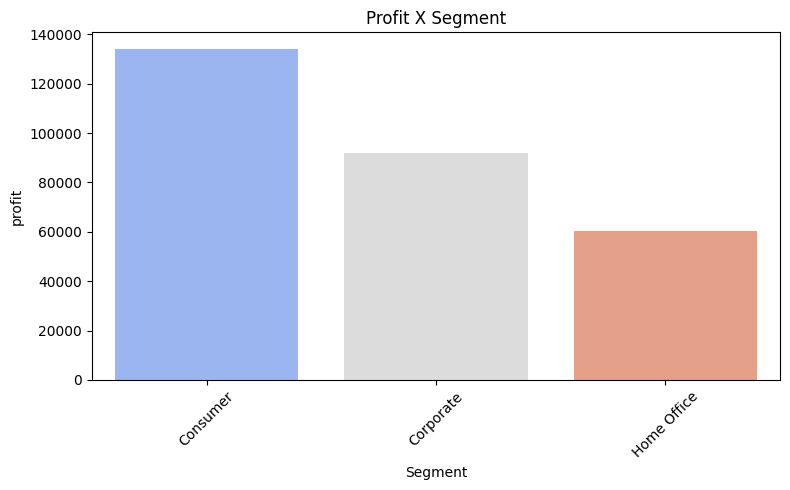

In [43]:
# Profit X Segment
category_revenue = df.groupby("Segment")["Profit"].sum().reset_index(name = "profit")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'profit', ascending = False)

# set figure size
plt.figure(figsize = (8,5))

# create bar plot
sns.barplot(x = "Segment", y = "profit", data = category_revenue, palette = "coolwarm")
plt.title("Profit X Segment", fontsize = 12)

# set x-axis rotation
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

### <b><span style='color:#DEB078'>5.11 |</span><span style='color:#C70039'> State</span></b>

In [44]:
state_count = df['State'].value_counts()
state_count

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

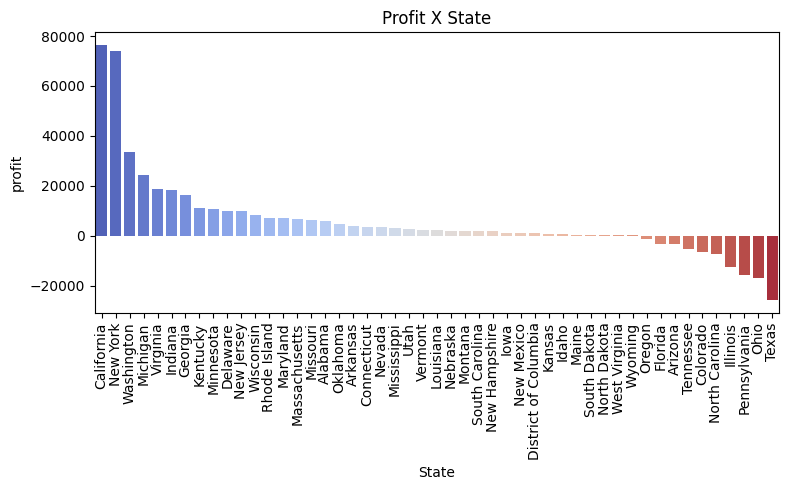

In [45]:
# Profit X State
category_revenue = df.groupby("State")["Profit"].sum().reset_index(name = "profit")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'profit', ascending = False)

# set figure size
plt.figure(figsize = (8,5))

# create bar plot
sns.barplot(x = "State", y = "profit", data = category_revenue, palette = "coolwarm")
plt.title("Profit X State", fontsize = 12)

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### <b><span style='color:#DEB078'>5.12 |</span><span style='color:#C70039'> Region</span></b>

In [46]:
region_count = df['Region'].value_counts()
region_count

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

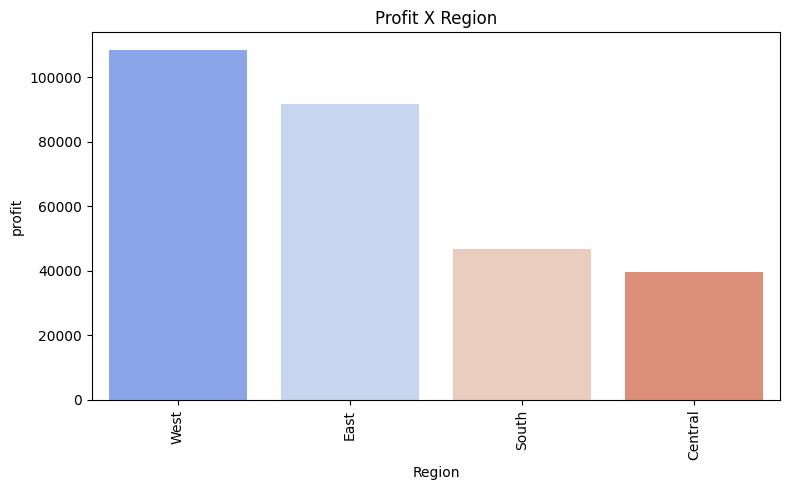

In [47]:
# Profit X Region
category_revenue = df.groupby("Region")["Profit"].sum().reset_index(name = "profit")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'profit', ascending = False)

# set figure size
plt.figure(figsize = (8,5))

# create bar plot
sns.barplot(x = "Region", y = "profit", data = category_revenue, palette = "coolwarm")
plt.title("Profit X Region", fontsize = 12)

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### <b><span style='color:#DEB078'>5.13 |</span><span style='color:#C70039'> Category</span></b>

In [48]:
category_count = df['Category'].value_counts()
category_count

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

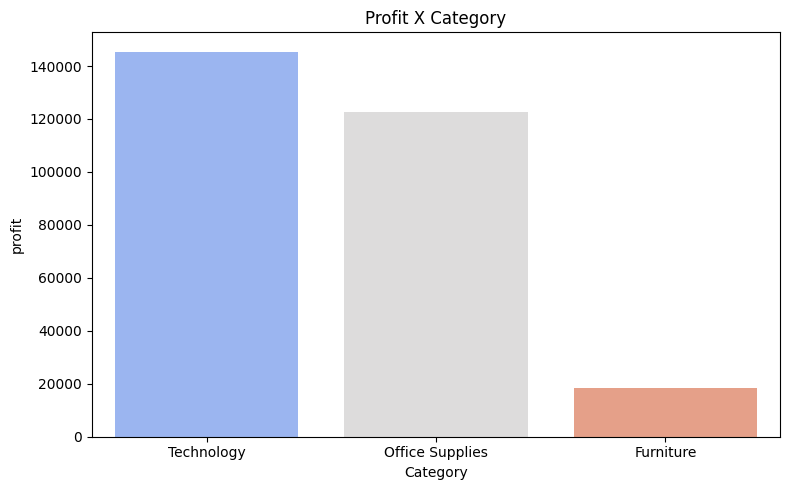

In [49]:
# Profit X Category
category_revenue = df.groupby("Category")["Profit"].sum().reset_index(name = "profit")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'profit', ascending = False)

# set figure size
plt.figure(figsize = (8,5))

# create bar plot
sns.barplot(x = "Category", y = "profit", data = category_revenue, palette = "coolwarm")
plt.title("Profit X Category", fontsize = 12)

# set x-axis rotation
plt.xticks(rotation = 0)

plt.tight_layout()
plt.show()

### <b><span style='color:#DEB078'>5.14 |</span><span style='color:#C70039'> Sub-Category</span></b>

In [50]:
sub_category_count = df['Sub-Category'].value_counts()
sub_category_count

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

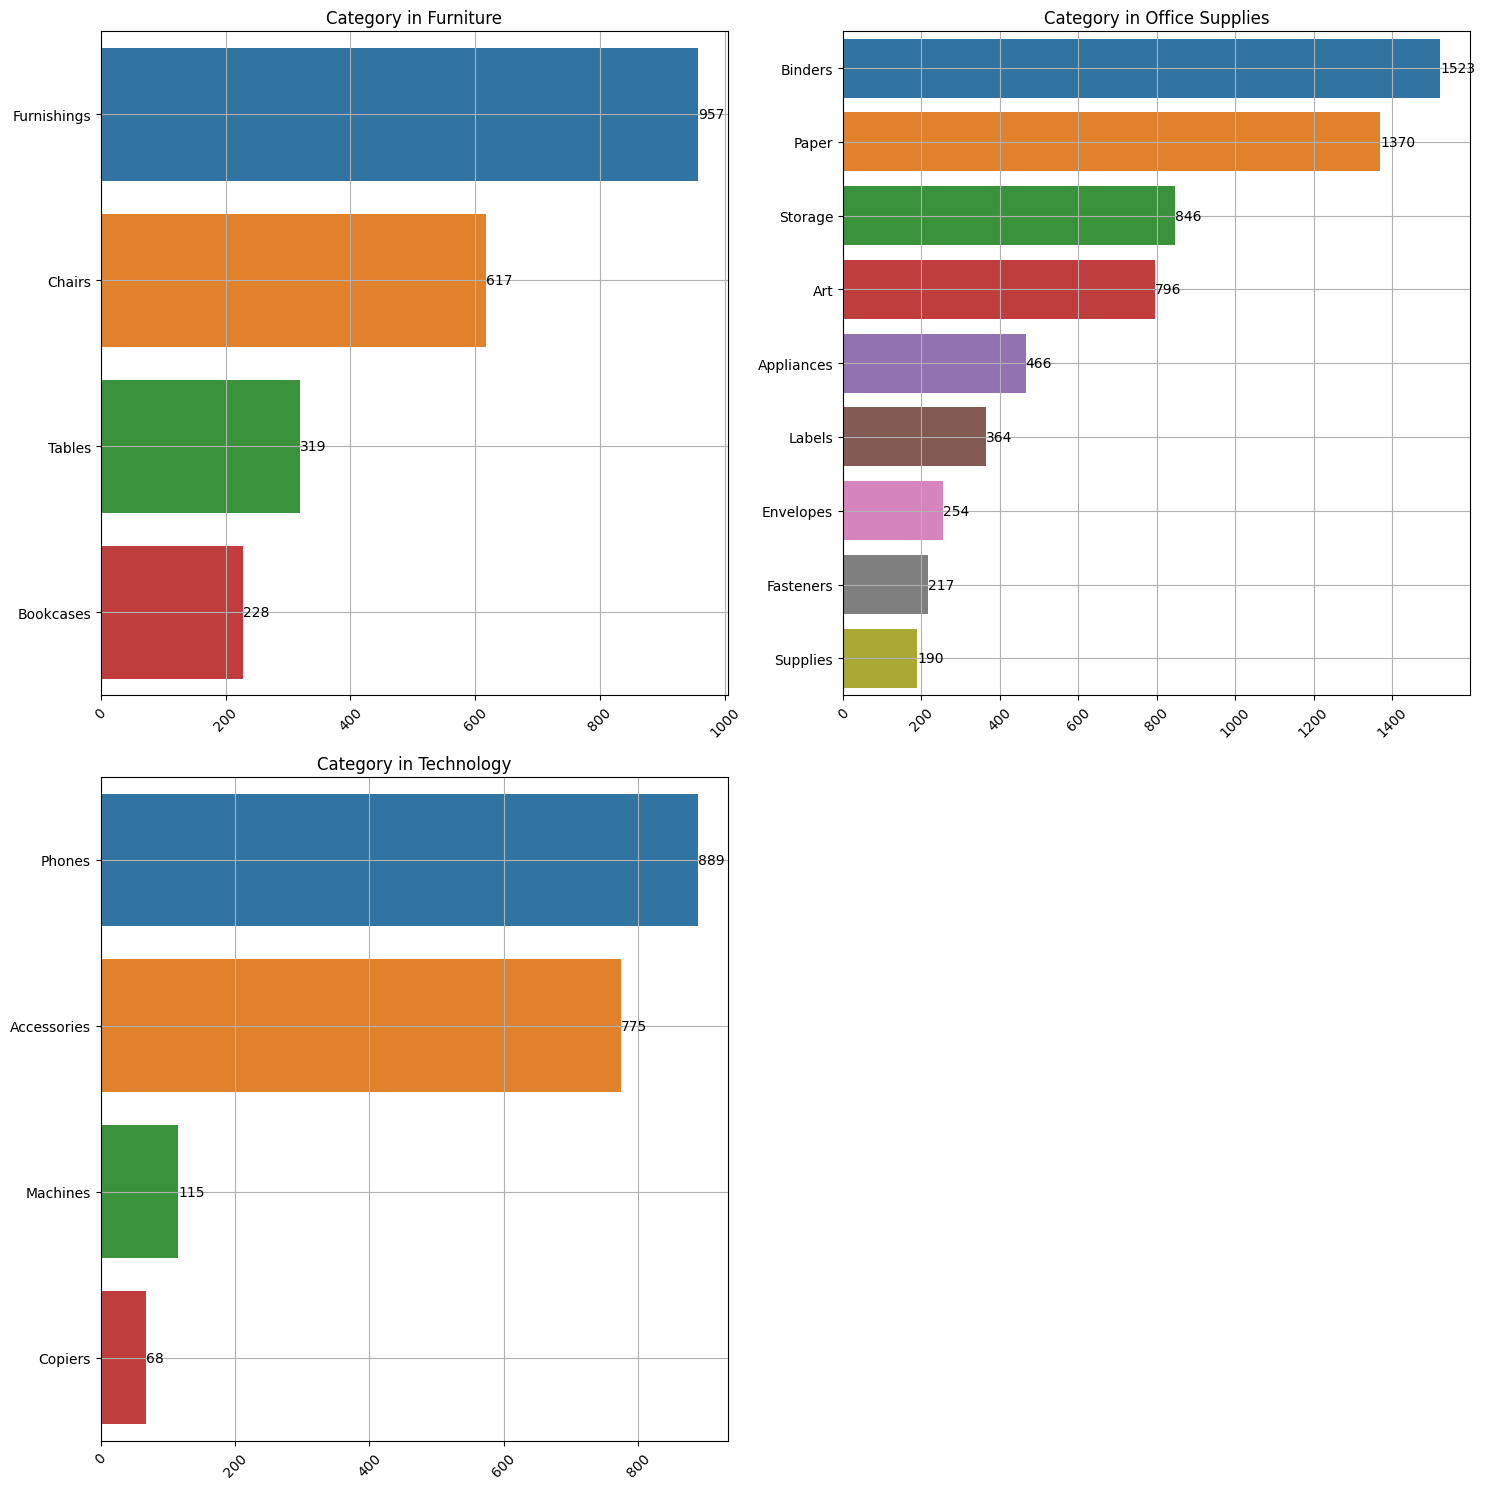

In [51]:
# Category X Sub-Category
counts = df.groupby(["Category", "Sub-Category"]).size().reset_index(name = "count")

# Get unique categories
categories = counts['Category'].unique()

# Create subplots for each category in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize = (15, 15))

# Flatten the axes for easier iteration
axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter data for each category
    subset = counts[counts['Category'] == category]
    
    # Sort the data by 'count' column in descending order
    subset = subset.sort_values('count', ascending = False)
    
    # Create a bar plot for each category with sorted order
    sns.barplot(x = 'count', y = 'Sub-Category', data = subset, ax = axes[i], order = subset['Sub-Category'])
    axes[i].set_title(f'Category in {category}')
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis = 'x', rotation = 45)
    axes[i].grid(True)
    
    # Adding bar labels
    for idx, bar in enumerate(axes[i].patches):
        axes[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, subset.iloc[idx]['count'], ha = 'left', va = 'center')

# Hide extra subplots if there are fewer categories than subplots
for j in range(len(categories), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

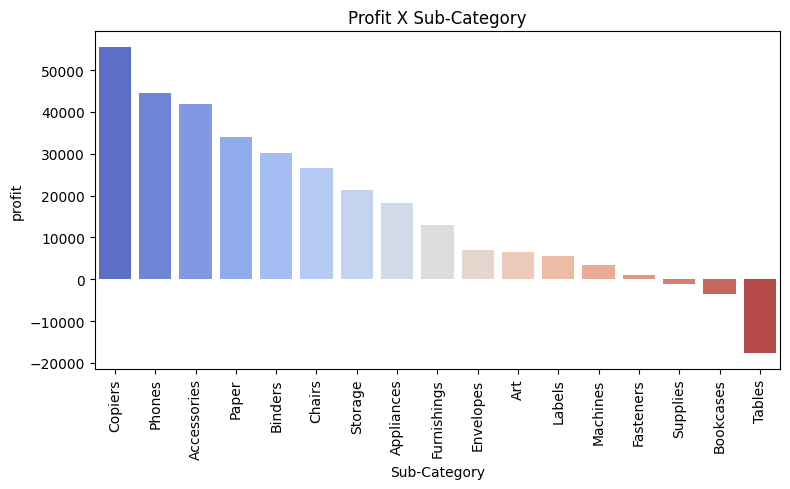

In [52]:
# Profit X Sub-Category
category_revenue = df.groupby("Sub-Category")["Profit"].sum().reset_index(name = "profit")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'profit', ascending = False)

# set figure size
plt.figure(figsize = (8,5))

# create bar plot
sns.barplot(x = "Sub-Category", y = "profit", data = category_revenue, palette = "coolwarm")
plt.title("Profit X Sub-Category", fontsize = 12)

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

### <b><span style='color:#DEB078'>5.15 |</span><span style='color:#C70039'> Product Name</span></b>

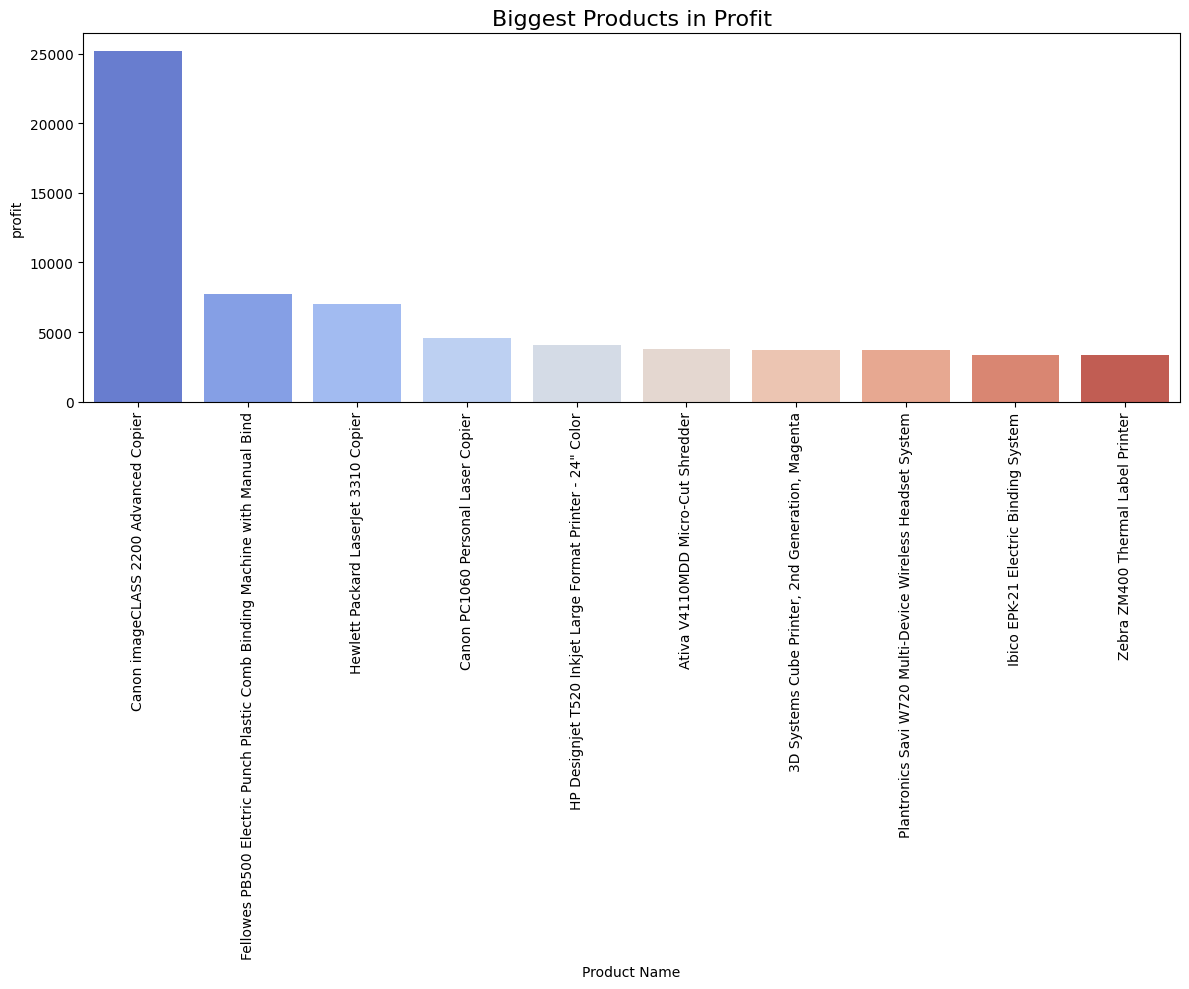

In [53]:
# Biggest Products in Profit
category_revenue = df.groupby("Product Name")["Profit"].sum().reset_index(name = "profit")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'profit', ascending = False).head(10)

# set figure size
plt.figure(figsize = (12,10))

# create bar plot
sns.barplot(x = "Product Name", y = "profit", data = category_revenue, palette = "coolwarm")
plt.title("Biggest Products in Profit", fontsize = 16)

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

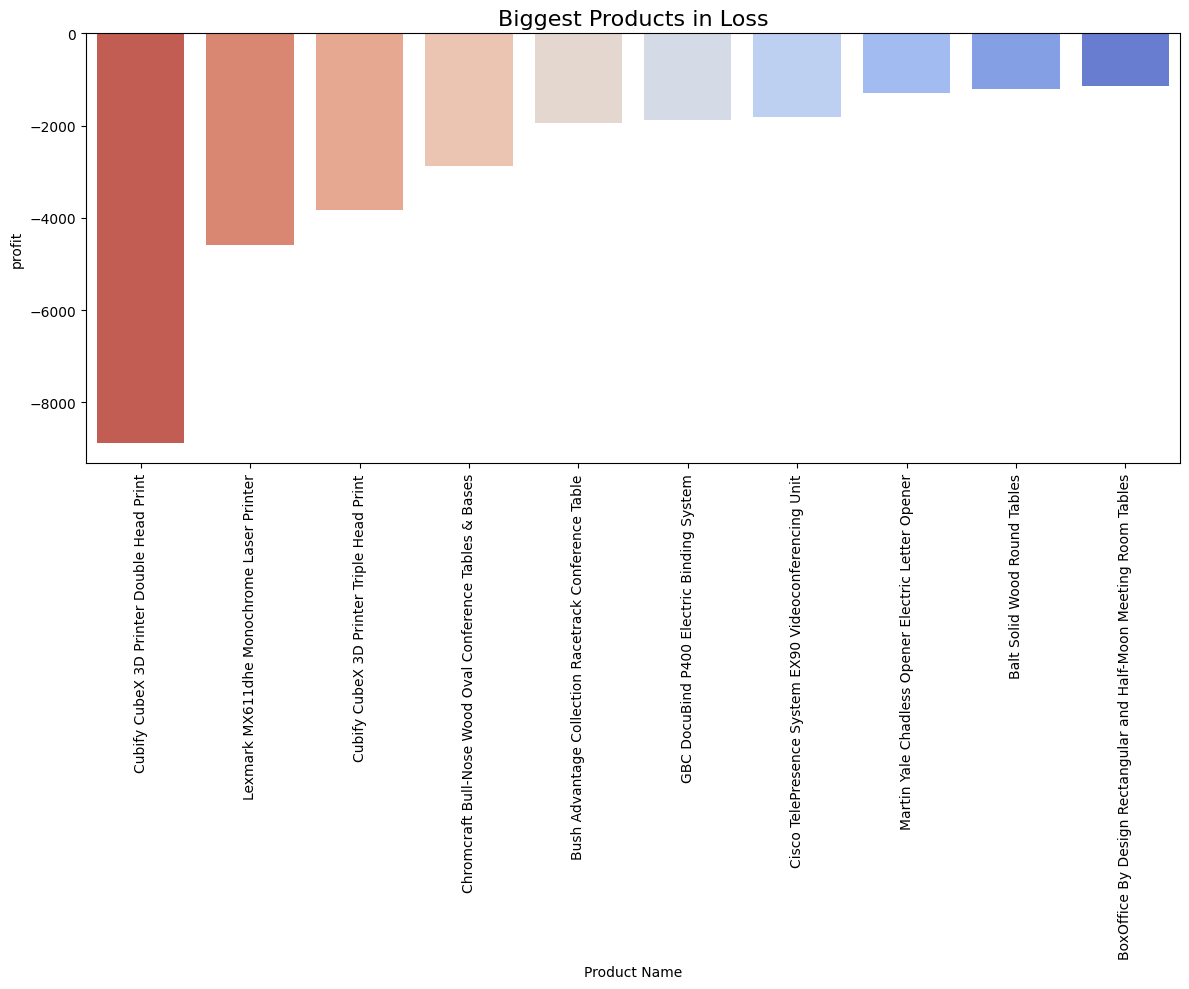

In [54]:
# Biggest Products in Loss
category_revenue = df.groupby("Product Name")["Profit"].sum().reset_index(name = "profit")

# sort category by revenue
category_revenue = category_revenue.sort_values(by = 'profit', ascending = True).head(10)

# set figure size
plt.figure(figsize = (12,10))

# create bar plot
sns.barplot(x = "Product Name", y = "profit", data = category_revenue, palette = "coolwarm_r")
plt.title("Biggest Products in Loss", fontsize = 16)

# set x-axis rotation
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

In [55]:
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month,day
0,CA-2013-152156,2013-09-11,2013-12-11,Second Class,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,2013,September,Wednesday


### <b><span style='color:#DEB078'>5.16 |</span><span style='color:#C70039'> Discount</span></b>

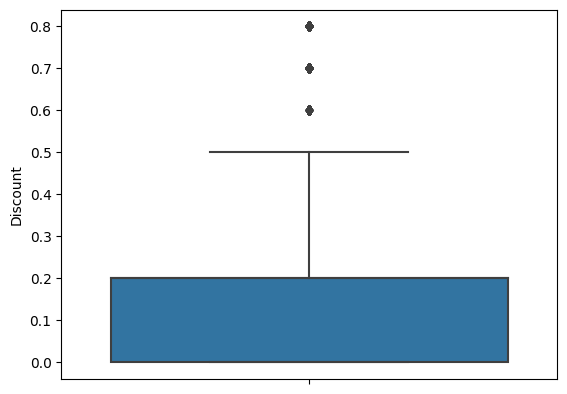

In [56]:
# Boxplot of Discount

sns.boxplot(y = "Discount", data = df)
plt.show()

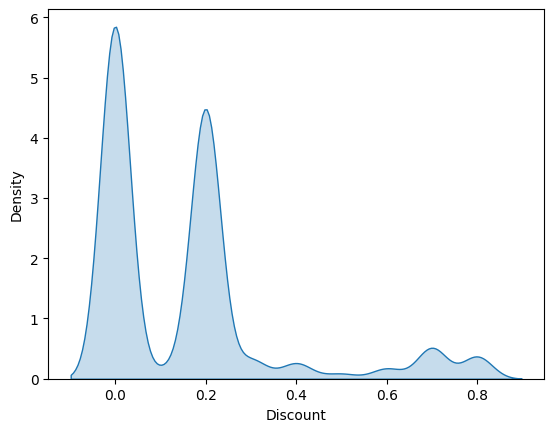

In [57]:
# see distribution of Discount

sns.kdeplot(x = df["Discount"], fill = True)
plt.show()

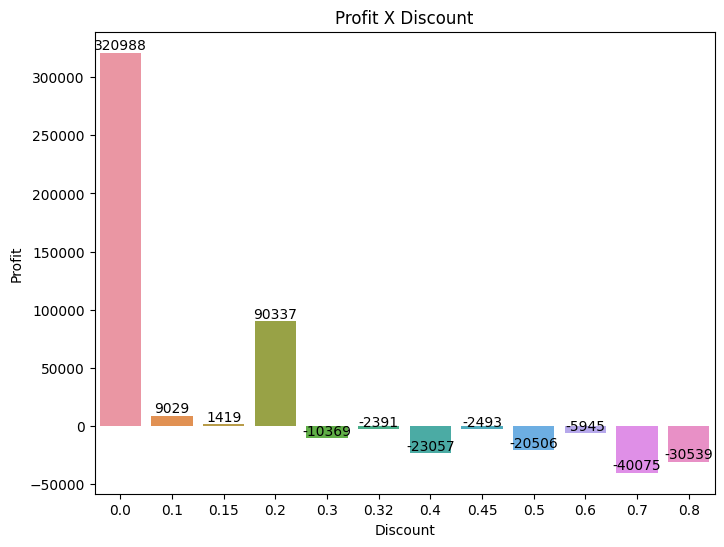

In [58]:
# Profit X Discount
revenue = df.groupby("Discount")["Profit"].sum().reset_index()

# create bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x = "Discount", y = "Profit", data = revenue)
plt.title("Profit X Discount", fontsize = 12)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', 
                xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

<div class="alert alert-block alert-info" style="background-color:#F0EEED;color:#C70039;border-color:black;width:80%;margin: auto;text-align: center;"><b>Insight: </b>In the graph above we can see that the profit appears mainly where there is no discount. But there is still profit with a discount of up to 0.2. From then on, there is a loss in sales.</div>

## <b><div style='padding:15px;background-color:#C70039;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked it, please upvote. Thank you very much.</div></b>